In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load dataset
df = pd.read_csv("combined_data.csv")  # Replace with your CSV file

# Step 2: Drop duplicates
df.drop_duplicates(inplace=True)

# Step 3: Drop rows with missing values
df.dropna(inplace=True)

# Step 4: Encode labels
label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])

# Step 5: Split features and labels
X = df.drop(columns=['Class'])
y = df['Class']

# Step 6: Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [3]:
# Step 8: Train Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

c:\Users\Parisa Usman\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [4]:
# Step 9: Predict and evaluate
y_pred = model.predict(X_test)

In [5]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Classification Report:

              precision    recall  f1-score   support

        Mild       0.47      0.33      0.39     34754
    Moderate       0.54      0.66      0.59     47886
      Normal       0.57      0.64      0.60     37335
      Severe       0.49      0.35      0.41     18299

    accuracy                           0.53    138274
   macro avg       0.52      0.50      0.50    138274
weighted avg       0.52      0.53      0.52    138274



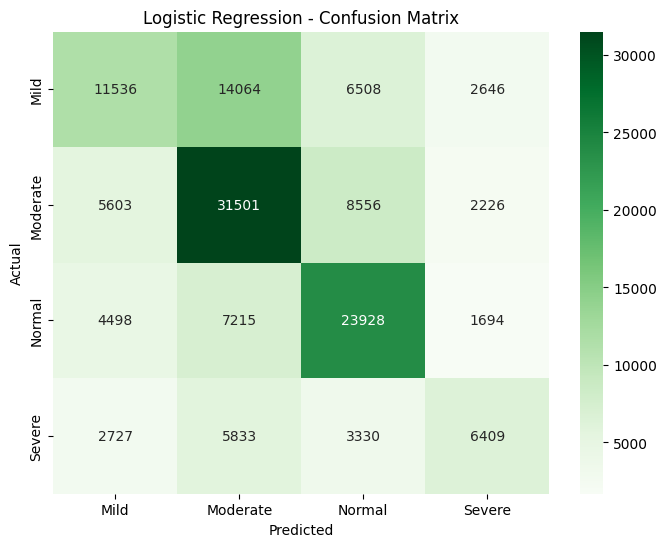

In [6]:
# Step 10: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()